In [2]:
import sys
import time
import gc
import random
import matplotlib.pyplot as plt
import graphviz

/home/xery/py2venv/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [26]:
def graph_heap(heap):
    if heap == []: return None
    dot = graphviz.Digraph()
    for i in xrange(int(len(heap)/2)+1):
        dot.node(str(i), str(heap[i]))
        if i*2+1 < len(heap):
            dot.node(str(i*2+1), str(heap[i*2+1]))
            dot.edge(str(i), str(i*2+1))
        if i*2+2 < len(heap):
            dot.node(str(i*2+2), str(heap[i*2+2]))
            dot.edge(str(i), str(i*2+2))
    return dot

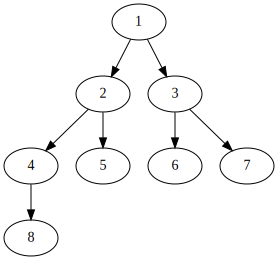

In [172]:
graph_heap([1,2,3,4,5,6,7,8])

In [20]:
def max3_index(arr, i1, i2, i3):
    """Returns the index of the max of three numbers in an array.
    """
    if arr[i1] > arr[i2]:
        if arr[i1] > arr[i3]:
            return i1
        else:
            return i3
    else:
        if arr[i2] > arr[i3]:
            return i2
        else:
            return i3

def swap(arr, i1, i2):
    """Swaps two elements of an array given by their indices.
    """
    tmp = arr[i1]
    arr[i1] = arr[i2]
    arr[i2] = tmp
    return arr

In [173]:
swap([1,2,3],0,2)

[3, 2, 1]

In [169]:
def timeit(function, repeats=3, nums=100000):
    co = compile(function, "", mode="eval")
    times = []
    gc.disable()
    for r in xrange(repeats):
        t1 = time.time()
        for n in xrange(nums):
            eval(co)
        t2 = time.time()
        times.append((t2-t1)/nums)
    gc.enable()
    return min(times)

# The `bubblesort` algorithm

In [3]:
a = [x for x in range(10,-1,-1)]
a

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [4]:
def bubblesort(arr):
    for passes in range(len(arr)-1):
        for i in range(len(arr)-2,-1+passes,-1):
            if arr[i] > arr[i+1]:
                tmp = arr[i]
                arr[i] = arr[i+1]
                arr[i+1] = tmp

In [7]:
# Test cases
for i in xrange(1000):
    length = random.randint(1, 1000)
    dut = [random.randint(0, length) for x in xrange(length)]
    dut1 = [x for x in dut]
    dut.sort()
    bubblesort(dut1)
    if (dut != dut1):
        print "Test FAILED:"
        print "dut: ", dut
        print "dut1: ", dut1
print "Test passed OK"

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-7-4b49d8550a21>, line 9)

In [5]:
%timeit bubblesort(a)
a

The slowest run took 6.45 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 8.03 µs per loop


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [96]:
timeit('bubblesort(a)')

7.325150966644287e-06

In [97]:
lens = (1, 10, 100, 1000, 10000)

times = []
for l in lens:
    test_arr = [l-x for x in xrange(l)]
    times.append(timeit("bubblesort(test_arr)", repeats=1, nums=10))
times

[3.5047531127929686e-06,
 2.2292137145996094e-05,
 0.0005675792694091797,
 0.040363621711730954,
 4.089430594444275]

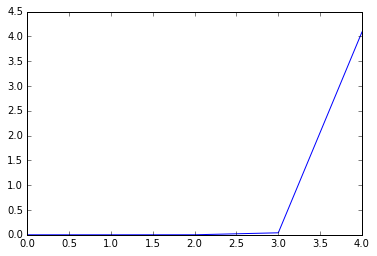

In [98]:
plt.plot(times)

# The `insertion sort` algorithm

In [106]:
a = [10-x for x in xrange(10)]
a

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [108]:
def insertionsort(arr):
    for i in xrange(1, len(arr)):
        ci = i
        while True:
            if ci == 0: break
            if arr[ci] < arr[ci-1]:
                tmp = arr[ci]
                arr[ci] = arr[ci-1]
                arr[ci-1] = tmp
                ci = ci-1
            else:
                break

In [109]:
insertionsort(a)
a

In [111]:
# Test cases
for i in xrange(1000):
    length = random.randint(1, 1000)
    dut = [random.randint(0, length) for x in xrange(length)]
    dut1 = [x for x in dut]
    dut.sort()
    insertionsort(dut1)
    if (dut != dut1):
        print "Test FAILED:"
        print "dut: ", dut
        print "dut1: ", dut1
print "Test passed OK"

Test passed OK


In [112]:
lens = (1, 10, 100, 1000, 10000)

times = []
for l in lens:
    test_arr = [l-x for x in xrange(l)]
    times.append(timeit("insertionsort(test_arr)", repeats=1, nums=10))
times

[2.5987625122070313e-06,
 5.0687789916992186e-05,
 0.00022208690643310547,
 0.013752985000610351,
 1.2448808908462525]

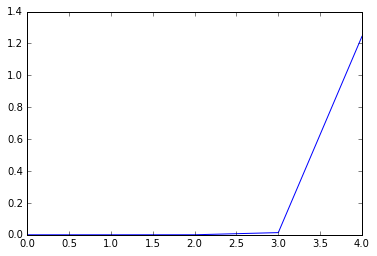

In [113]:
plt.plot(times)

# The `heap sort` algorithm

In [162]:
a = [x for x in xrange(1,8)]
a = [random.randint(0,20) for x in xrange(20)]

Pseudocode:
```
# Phase 1: create an inverted heap
for i in 1 to array.len -1:
    # Propagate to root
    current_item = i
    while True:
        if current_item is at the start of array then break
        calculate the parent of the current item
        if the current item is smaller than its parent then break
        else swap the current_item with its parent
        set the current_item to its parent
    
# Phase 2: empty the heap
    for end_item = last item of array to the 2nd item
        swap first item with end_item
        # Push the first item as further down the heap as possible, 
        #   replacing it with the next biggest number
        current_item = first item
        while True:
            if current_item has no children before the end_item then break
            if current_item has one child assume max_child = this child
            else max_child = max of the two children
            if current_item > max_child then break
            swap current_item with max_child
            set the current_item to the max_child
```

In [163]:
def heapsort(arr):
    # Step 1: Building the heap
    for i in xrange(1, len(arr)):
        ci = i          # set current item
        while True:
            if ci == 0: break
            parent = int((ci-1)/2)
            if arr[ci] < arr[parent]: break
            swap(arr, ci, parent)
            ci = parent
    
    intermediate = [x for x in arr]
    
    # Step 2: Sorting the heap
    for end in xrange(len(arr)-1, 0, -1):
        swap(arr, 0, end)
        ci = 0
        while True:
            child1 = ci * 2 + 1
            child2 = ci * 2 + 2
            if child1 >= end: break
            max_child = child1
            if child2 < end:
                if arr[child2] > arr[child1]:
                    max_child = child2
            if arr[ci] > arr[max_child]: break
            swap(arr, ci, max_child)
            ci = max_child
            
    return (intermediate, arr)
            

In [164]:
(interm, sorted) = heapsort(a)
sorted

[2, 2, 3, 6, 6, 6, 6, 6, 8, 9, 12, 12, 14, 15, 16, 17, 17, 19, 19, 19]

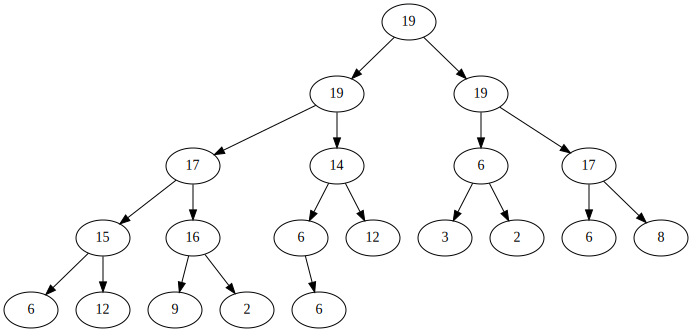

In [165]:
gg = graph_heap(interm)
gg

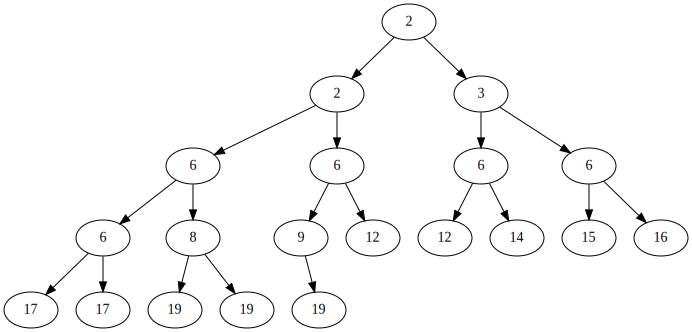

In [166]:
gg = graph_heap(sorted)
gg

In [167]:
# Test cases
for i in xrange(1000):
    length = random.randint(1, 1000)
    dut = [random.randint(0, length) for x in xrange(length)]
    dut1 = [x for x in dut]
    dut.sort()
    heapsort(dut1)
    if (dut != dut1):
        print "Test FAILED:"
        print "dut: ", dut
        print "dut1: ", dut1
print "Test passed OK"

Test passed OK


In [171]:
lens = (1, 10, 100, 1000, 10000)

times = []
for l in lens:
    test_arr = [l-x for x in xrange(l)]
    times.append(timeit("heapsort(test_arr)", repeats=1, nums=10))
times

[3.409385681152344e-06,
 4.6086311340332034e-05,
 0.0006983995437622071,
 0.008852505683898925,
 0.10875449180603028]

In [184]:
%timeit heapsort([10,9,8,7,6,5,4,3,2,1])

100000 loops, best of 3: 13.6 µs per loop


In [185]:
%timeit heapsort([1,2,3,4,5,6,7,8,9,10])

10000 loops, best of 3: 19.6 µs per loop


# The `mergesort` algorithm

In [176]:
a = [random.randint(0,20) for x in xrange(20)]
a

[1, 10, 11, 17, 16, 17, 4, 2, 13, 19, 9, 10, 20, 1, 10, 19, 14, 6, 5, 14]

Pseudocode:
```
if length array is not divisible by 2:
    add as a last element float('+inf')
    
group_size = 1
repeat forever:
for g in all groups of size group_size step 2:
    in-place merge group g and g+1
    group_size *= 2
    if group_size == array_length:
        break
    
in-place merge group k and k+1
    for all elements in k+1:
        bubble the current element of group k+1 over the elements of group k until
            it meets either a smaller element or the left edge of group k
    
non-in-place merge groups k and k+1:
    for i in all elements of group k  AND for j in all elements of group k+1:
        if still elements in group k:
            if still elements in group k+1:
                if current element in k < current element in k+1:
                    
        
```

In [30]:
def mergesort(arr):
    if len(arr) % 2 == 1:
        arr.append(float('inf'))
        
    group_size = 1
    while True:
        for group in xrange(0, len(arr)/group_size, 2):
            group1_left_edge = group * group_size
            group2_left_edge = (group+1) * group_size
            for i in xrange(group_size):
                cur_group2_element = i + group2_left_edge
                while arr[cur_group2_element] < arr[cur_group2_element-1] and cur_group2_element > group1_left_edge:
                    swap(arr, cur_group2_element, cur_group2_element-1)
                    cur_group2_element -= 1
        group_size *= 2
        if group_size == len(arr):
            break
            
    return arr

In [31]:
mergesort([5,3,6,8,2,0,4,1])

[0, 1, 2, 3, 4, 5, 6, 8]

In [ ]:
# Test cases
for i in xrange(1000):
    length = random.randint(1, 1000)
    dut = [random.randint(0, length) for x in xrange(length)]
    dut1 = [x for x in dut]
    dut.sort()
    mergesort(dut1)
    if (dut != dut1):
        print "Test FAILED:"
        print "dut: ", dut
        print "dut1: ", dut1
print "Test passed OK"

IndexError: list index out of range

> <ipython-input-30-87d18ecdc3e7>(12)mergesort()
     10             for i in xrange(group_size):
     11                 cur_group2_element = i + group2_left_edge
---> 12                 while arr[cur_group2_element] < arr[cur_group2_element-1] and cur_group2_element > group1_left_edge:
     13                     swap(arr, cur_group2_element, cur_group2_element-1)
     14                     cur_group2_element -= 1

ipdb> cur_group2_element
436
ipdb> len(arr)
436
ipdb> i
0
ipdb> group_size
4
ipdb> arr[436]
*** IndexError: list index out of range
ipdb> arr[435]
345
ipdb> group2_left_edge
436
ipdb> group
108


In [33]:
pdb

Automatic pdb calling has been turned ON
